In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Determine the general chemistry of the system
chemistry = pybamm.parameter_sets.Chen2020
chemistry["cell"] = "1_NMC_lab"
chemistry["experiment"] = "01C_discharge_from_full_NMC_lab"

parameter_values = pybamm.ParameterValues(chemistry=chemistry)

In [34]:
#Defining the different experiments
experiment_2C = pybamm.Experiment([
    ("Discharge at 2 C until 2.75V",
    "Rest for 1 hours",
    "Charge at 2 C until 4.20V",)
    
])

experiment_1C = pybamm.Experiment([
    ("Discharge at 1 C until 2.75V",
    "Rest for 1 hours",
    "Charge at 1 C until 4.20V",)
    
])

experiment_Cover2 = pybamm.Experiment([
    ("Discharge at C/2 until 2.75V",
    "Rest for 1 hours",
    "Charge at C/2 until 4.20V",)
    
])

experiment_Cover4 = pybamm.Experiment([
    ("Discharge at C/4 until 2.75V",
    "Rest for 1 hours",
    "Charge at C/4 until 4.20V",)
    
])

experiment_Cover8 = pybamm.Experiment([
    ("Discharge at C/8 until 2.75V",
    "Rest for 1 hours",
    "Charge at C/8 until 4.20V",)
    
])

In [35]:
#Determine the model sellected:
model = pybamm.lithium_ion.DFN()

#Simulation of the different environments
sim1_2C = pybamm.Simulation(model, experiment=experiment_2C, parameter_values=parameter_values)
sim1_2C.solve()
sim1_1C = pybamm.Simulation(model, experiment=experiment_1C, parameter_values=parameter_values)
sim1_1C.solve()
sim1_Cover2 = pybamm.Simulation(model, experiment=experiment_Cover2, parameter_values=parameter_values)
sim1_Cover2.solve()
sim1_Cover4 = pybamm.Simulation(model, experiment=experiment_Cover4, parameter_values=parameter_values)
sim1_Cover4.solve()
sim1_Cover8 = pybamm.Simulation(model, experiment=experiment_Cover8, parameter_values=parameter_values)
sim1_Cover8.solve()

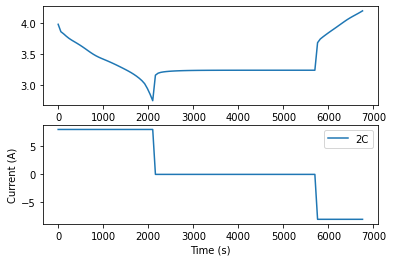

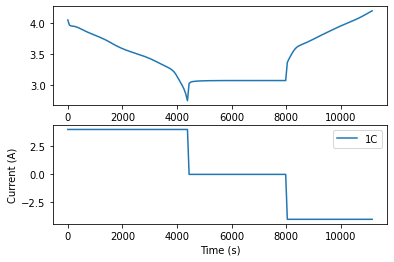

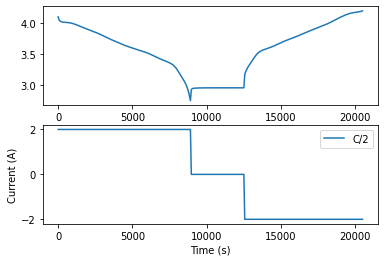

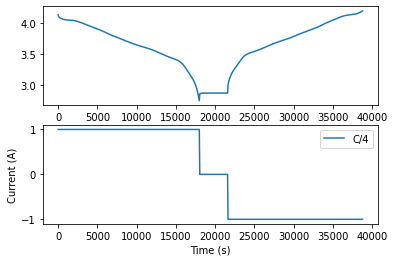

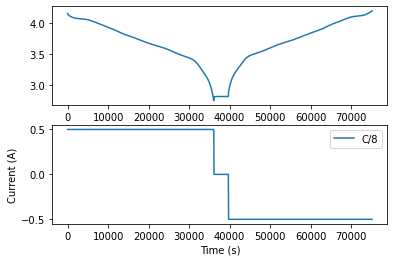

In [42]:
#Solve and plot
solutions =  [sim1_2C.solution, sim1_1C.solution, sim1_Cover2.solution, sim1_Cover4.solution, sim1_Cover8.solution]
labels = ["2C","1C","C/2","C/4","C/8"]

for sol,label in zip(solutions,labels):
    t = sol["Time [s]"].data
    V = sol["Battery voltage [V]"].data
    dcap = sol["Discharge capacity [A.h]"].data
    I = sol["Current [A]"].data
    fig, (ax1, ax2) = plt.subplots(2)
    ax1.plot(t, V, label=label)
    ax2.plot(t, I, label=label)
  
    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Current (A)")
